图像识别问题数据集：
<img src="images/cnn-dataset.png" style="width:450px;height:300px;">
LeNet 5 模型:
<img src="images/lenet-5.png" style="width:850px;height:300px;">

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print('train images: {}, train labels: {}, validation images: {}, validation labels: {}'.format(
  mnist.train.images.shape, mnist.train.labels.shape, mnist.validation.images.shape, mnist.validation.labels.shape
))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train images: (55000, 784), train labels: (55000, 10), validation images: (5000, 784), validation labels: (5000, 10)


label is: 7


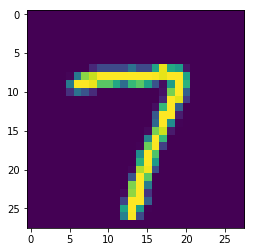

In [11]:
idx = 100
plt.imshow(mnist.train.images[idx].reshape(28, 28))
print('label is: {}'.format(np.argmax(mnist.train.labels[idx])))

In [12]:
Model = tf.keras.models.Model
Input, Reshape, Dense, Conv2D = tf.keras.Input, tf.keras.layers.Reshape, tf.keras.layers.Dense, tf.keras.layers.Conv2D
MaxPooling2D, Flatten = tf.keras.layers.MaxPooling2D, tf.keras.layers.Flatten

x = x_ = Input(shape=(784, ), name='lenet_input')
x_ = Reshape(target_shape=(28, 28, 1))(x_)
x_ = Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='relu')(x_)
x_ = MaxPooling2D(pool_size=(2, 2), strides=2)(x_)
x_ = Conv2D(16, kernel_size=(5, 5), strides=1, activation='relu')(x_)
x_ = MaxPooling2D(pool_size=(2, 2), strides=2)(x_)
x_ = Flatten()(x_)
x_ = Dense(120, activation='relu')(x_)
x_ = Dense(84, activation='relu')(x_)
y = x_ = Dense(10, activation='softmax', name='lenet_output')(x_)

model = Model(x, y)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metric='categorical_accuracy')
lenet5 = tf.keras.estimator.model_to_estimator(keras_model=model)

train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"lenet_input": mnist.train.images}, y=mnist.train.labels, num_epochs=3, shuffle=True)
lenet5.train(train_input_fn)

validation_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"lenet_input": mnist.validation.images}, y=mnist.validation.labels, num_epochs=1, shuffle=False)
predictions = lenet5.predict(validation_input_fn)
num_correct = np.sum(np.argmax(mnist.validation.labels, axis=-1) == [np.argmax(p['lenet_output']) for p in predictions])
print('accuracy: {}'.format(num_correct / len(mnist.validation.labels)))


INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/lj/b2trvfyj0mjbjf90yx92y6d80000gn/T/tmpfplgq5h5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12664c518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/lj/b2trvfyj0mjbjf90yx92y6d80000gn/T/tmpfplgq5h5/keras_model.ckpt
INFO